Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4298,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
4299,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
4300,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
4301,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
4302,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(4303, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       4303 non-null   int64  
 1   sex       4303 non-null   int64  
 2   cp        4303 non-null   int64  
 3   trestbps  4303 non-null   int64  
 4   chol      4303 non-null   int64  
 5   fbs       4303 non-null   int64  
 6   restecg   4303 non-null   int64  
 7   thalach   4303 non-null   int64  
 8   exang     4303 non-null   int64  
 9   oldpeak   4303 non-null   float64
 10  slope     4303 non-null   int64  
 11  ca        4303 non-null   int64  
 12  thal      4303 non-null   int64  
 13  target    4303 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 470.8 KB


In [7]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,54.242854,0.670230,1.006739,131.606786,246.960028,0.147571,0.525215,150.547293,0.325354,1.023216,1.408320,0.707413,2.312573,0.560307
std,9.202854,0.470184,1.041314,17.451112,53.282379,0.354716,0.525725,22.640389,0.468562,1.140515,0.615464,1.015756,0.608439,0.496407
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,137.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,2411
0,1892


1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [10]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [11]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      63    1   3       145   233    1        0      150      0      2.3   
1      37    1   2       130   250    0        1      187      0      3.5   
2      41    0   1       130   204    0        0      172      0      1.4   
3      56    1   1       120   236    0        1      178      0      0.8   
4      57    0   0       120   354    0        1      163      1      0.6   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
4298   71    0   2       110   265    1        0      130      0      0.0   
4299   41    1   1       120   157    0        1      182      0      0.0   
4300   42    0   2       120   209    0        1      173      0      0.0   
4301   62    0   0       138   294    1        1      106      0      1.9   
4302   54    1   0       122   286    0        0      116      1      3.2   

      slope  ca  thal  
0         0   0     1  
1         0   0     2  
2  

In [12]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
4298    1
4299    1
4300    1
4301    0
4302    0
Name: target, Length: 4303, dtype: int64


Splitting the Data into Training data & Test Data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(4303, 13) (3442, 13) (861, 13)


Model Training

Logistic Regression

In [15]:
model = LogisticRegression()

In [16]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [17]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [18]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8503776873910517


In [19]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [21]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8420441347270615


--- Training Logistic Regression ---


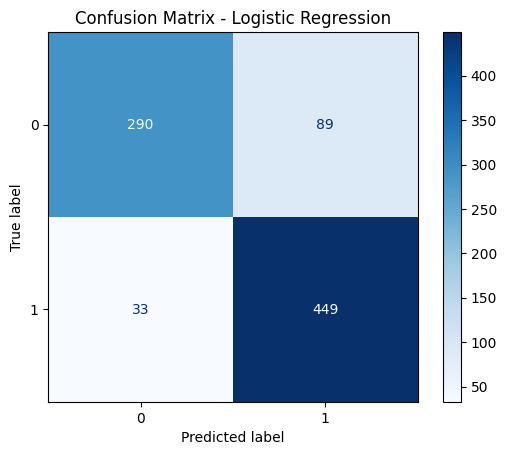

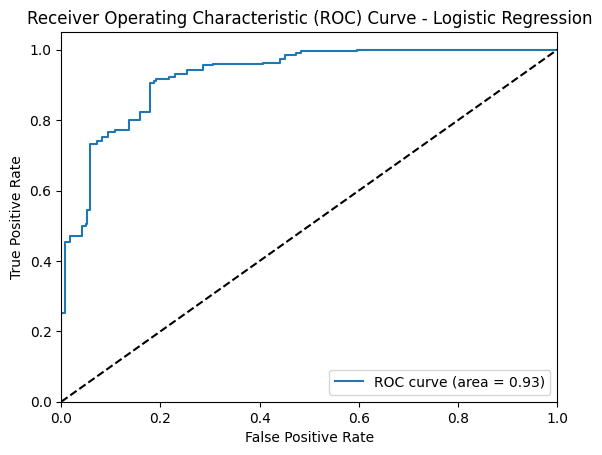

--- Training K-Nearest Neighbors (KNN) ---


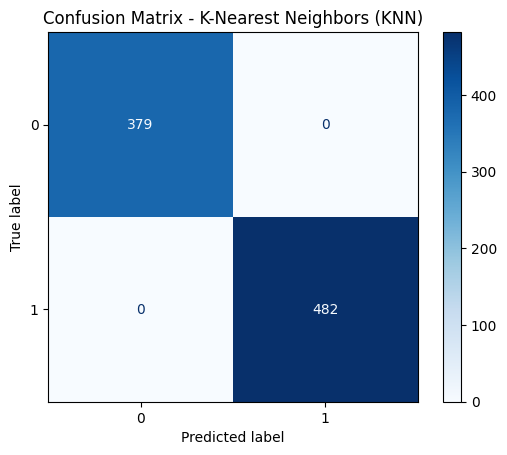

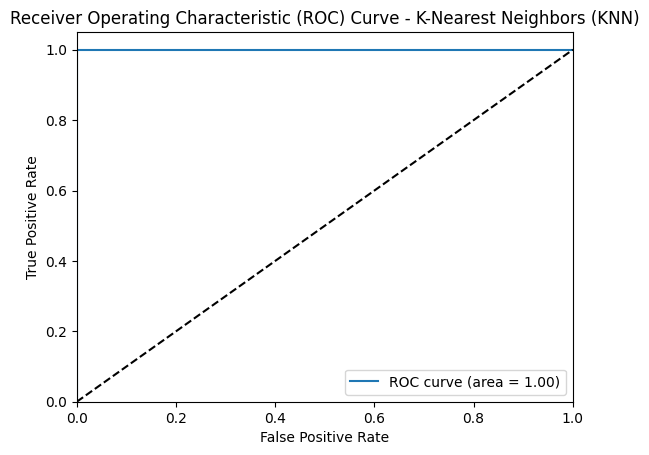

--- Training Stochastic Gradient Descent (SGD) ---


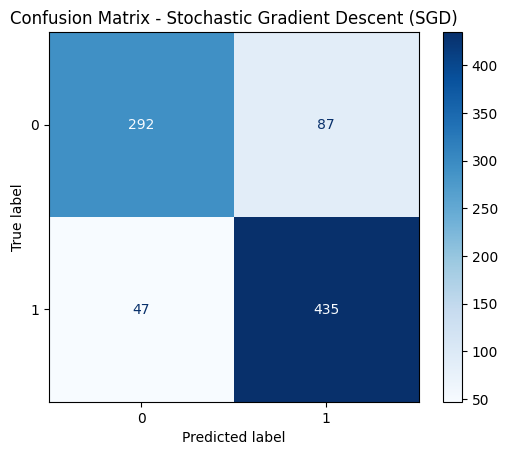

--- Training Support Vector Machine (SVM) ---


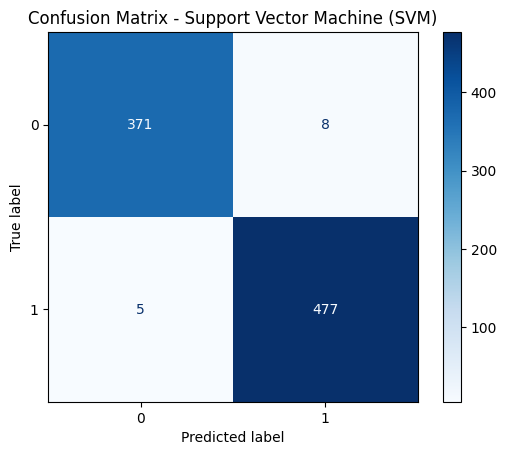

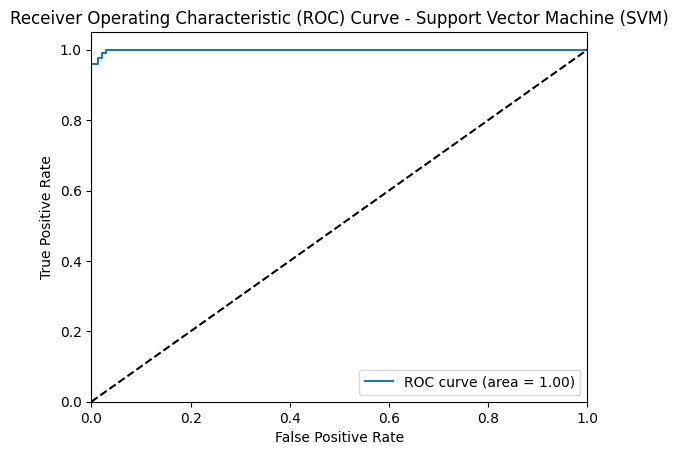

--- Training Naive Bayes ---


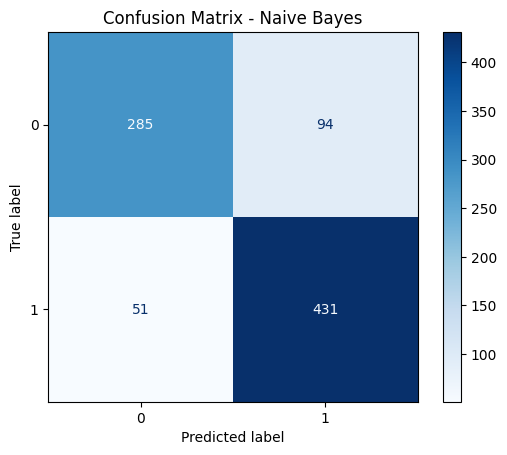

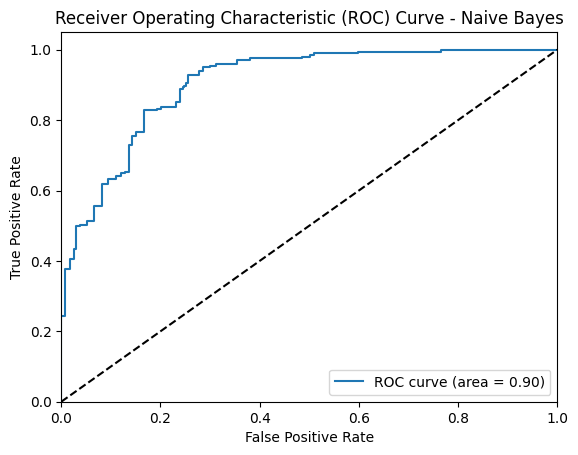

--- Training Decision Tree ---


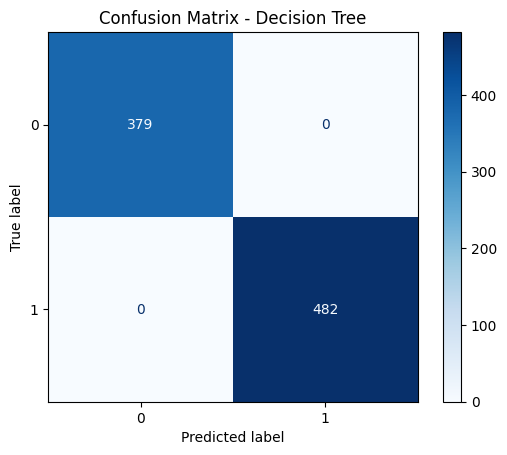

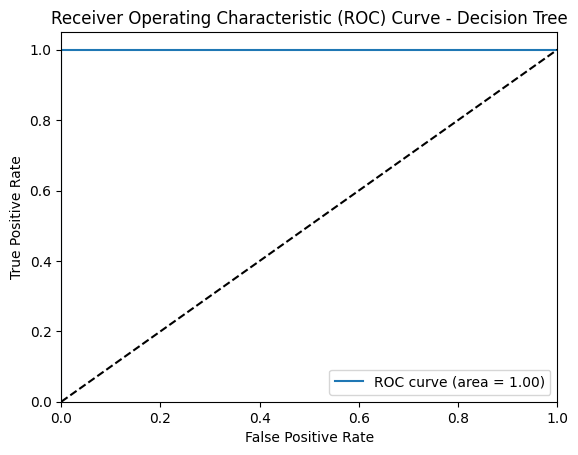

--- Training Random Forest ---


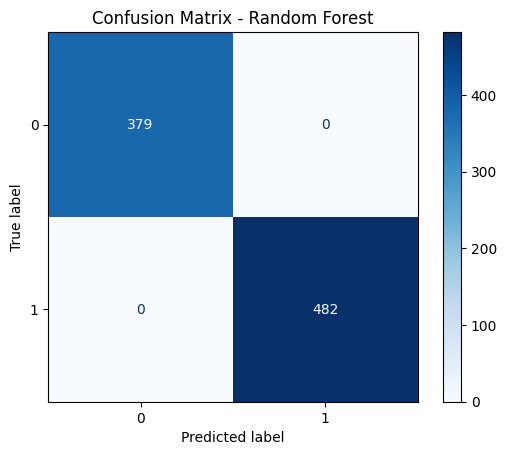

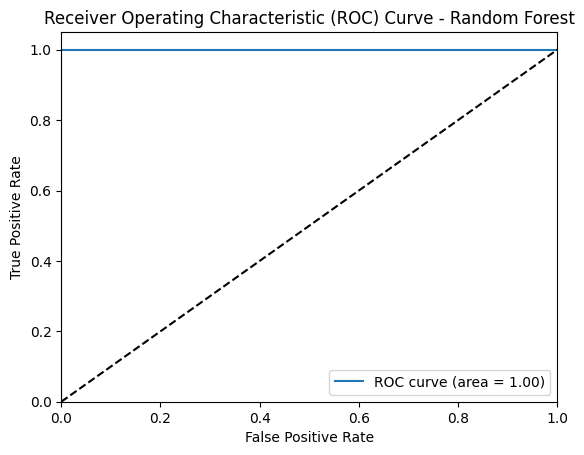

--- Training XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:40:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


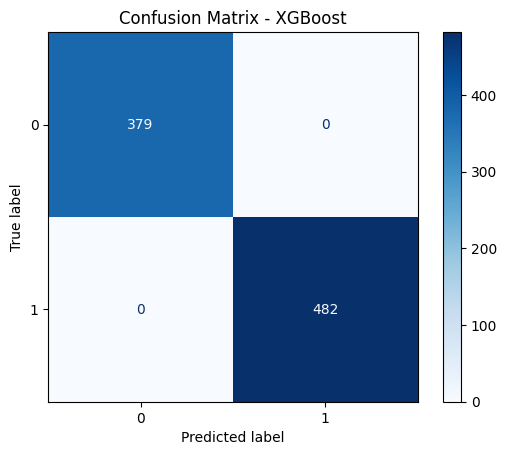

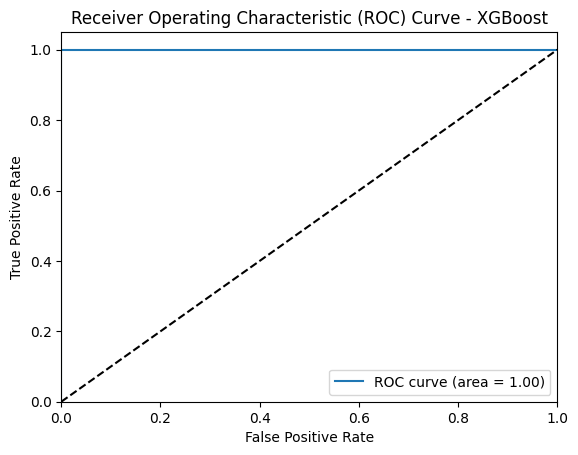



--- Model Performance Summary ---
                                   Accuracy Precision    Recall  F1 Score  \
Logistic Regression                0.858304  0.834572  0.931535  0.880392   
K-Nearest Neighbors (KNN)               1.0       1.0       1.0       1.0   
Stochastic Gradient Descent (SGD)  0.844367  0.833333   0.90249  0.866534   
Support Vector Machine (SVM)       0.984901  0.983505  0.989627  0.986556   
Naive Bayes                        0.831591  0.820952  0.894191  0.856008   
Decision Tree                           1.0       1.0       1.0       1.0   
Random Forest                           1.0       1.0       1.0       1.0   
XGBoost                                 1.0       1.0       1.0       1.0   

                                    ROC-AUC  
Logistic Regression                0.925902  
K-Nearest Neighbors (KNN)               1.0  
Stochastic Gradient Descent (SGD)       N/A  
Support Vector Machine (SVM)        0.99919  
Naive Bayes                        0.904

In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay # Explicitly import ConfusionMatrixDisplay

# Import the models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# --- 1. Load and Prepare the Data ---
# Load your dataset from a CSV file
# Make sure the target variable (what you want to predict) is in a column named 'target'
try:
    df = pd.read_csv('/content/heart.csv')
except FileNotFoundError:
    print("Error: 'heart.csv' not found. Please replace with the actual path to your data.")
    # As a placeholder, creating a dummy dataframe
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=208, n_features=60, n_informative=10, n_redundant=10, random_state=42)
    df = pd.DataFrame(X)
    df['target'] = y


# Separate features (X) and the target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# --- 2. Split the Data into Training and Testing Sets ---
# This divides the data so you can train the model on one part and test its performance on another.
# test_size=0.2 means 20% of the data will be used for testing.
# random_state ensures the split is the same every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 3. Scale the Features (Optional but Recommended) ---
# Scaling standardizes the feature values (e.g., mean=0, std=1), which helps many models perform better.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- 4. Initialize and Train the Models ---

# Create a dictionary to hold all the models you want to train
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Stochastic Gradient Descent (SGD)": SGDClassifier(),
    "Support Vector Machine (SVM)": SVC(probability=True), # probability=True is needed for ROC-AUC
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Loop through each model, train it, and store its performance
results = {}
for name, model in models.items():
    print(f"--- Training {name} ---")

    # Train the model on the (scaled) training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'


    # Store the results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc
    }

    # Display Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(0), str(1)]) # Convert labels to strings
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Display ROC Curve
    if y_pred_proba is not None and roc_auc != 'N/A':
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()


# --- 5. Display the Results ---
print("\n\n--- Model Performance Summary ---")
results_df = pd.DataFrame(results).T
print(results_df)

Building a Predictive System

In [27]:
y_pred = model.predict(X_test)

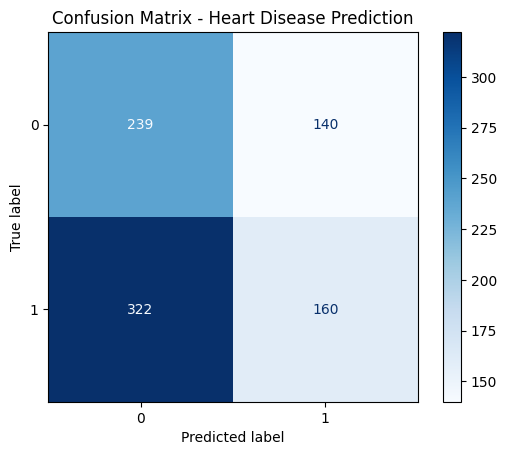

In [28]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Heart Disease Prediction")
plt.show()

Accuracy: 0.4634146341463415


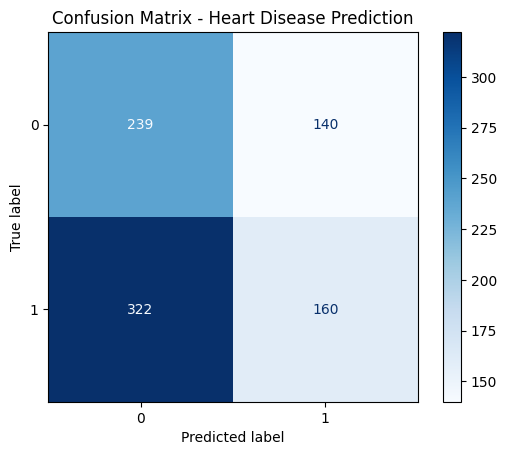

In [29]:
# Predict using the model
y_pred = model.predict(X_test)

# Accuracy (optional)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(Y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Heart Disease Prediction")
plt.show()

In [30]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


Saving the trained model

In [31]:
import pickle

In [32]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [33]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [34]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
